**E.D.A of Fuel Quality Data from  the Federal Energy Regulatory Commission**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing,
import matplotlib.pyplot as plt #plotting
import matplotlib.gridspec as gridspec #plotting
import seaborn as sns #plotting
sns.set(style="whitegrid") # to give the graphs a particular design
plt.rc('figure', figsize=(20, 10)) #to make allgraphs the same size

In [2]:
#Source Data
url='https://github.com/WalePhenomenon/climate_change/blob/master/fuel_ferc1.csv?raw=true'
fuel_data = pd.read_csv(url, error_bad_lines=False)
fuel_data = pd.DataFrame(fuel_data)
fuel_data.describe(include='all')


,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,f1_fuel_2017_12_108_2_1,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


In [3]:
#exploring the first five rows
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


We can infer that column (report_year, plant_name_ferc1,fuel_type_code_pudl,fuel_unit) are categorical data and will be most suited to frequency exploration with the other columns.

The record_id is just a serial number (ordinal data).

utility_id appears to be numerical grouping of the plant, the numbers used are cut from the record_id,

There are over 2315 unique plants in the dataset (column:- plant_name_ferc1) , a colleague did a bit of googling and discovered the powerplants in a group are either located in the same US state or in states in close proximity to each other

For example, the two power plants in with utility_id 1 are in Indiana and most of the power plants in group 2 are in Alabama and neighbouring states as well as other group.

So it is safe to say the utility_id can be used to group the plants based on location.

In [4]:
#checking for missing values 
fuel_data.isnull().sum()

record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

There are 180 rows in the fuel_unit column with missing values.

In [5]:
#further exploration of the fuel_unit reveal that:
fuel_data.groupby('fuel_unit')['fuel_unit'].count()

fuel_unit
bbl        7998
gal          84
gramsU      464
kgU         110
mcf       11354
mmbtu       180
mwdth        95
mwhth       100
ton        8958
Name: fuel_unit, dtype: int64

Most common unit used for this column is the 'mcf' unit.

In [6]:
fuel_data.groupby('fuel_type_code_pudl')['fuel_unit'].value_counts()

fuel_type_code_pudl  fuel_unit
coal                 ton           8438
                     mmbtu           52
                     mcf              5
                     bbl              1
gas                  mcf          11333
                     mmbtu           94
                     ton              4
                     bbl              2
nuclear              gramsU         464
                     kgU            110
                     mwhth          100
                     mwdth           95
                     mmbtu           34
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                ton             77
                     bbl             42
                     mcf              9
                     gal              3
waste                ton            436
                     bbl              1
Name: fuel_unit, dtype: int64

We can infer that the most common unit of measurement in general is mcf but; for oil is bbl,coal (ton), gas(mcf), nuclear(gramsU) with far less prevalent other units

In [7]:
#The rows with missing data
 #df.loc[] is very useful when you want to view a snapshot of dataframe that fills a specified condition
fuel_data.loc[fuel_data.isnull().any(axis=1)]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,NaN,3547.0,5.606160,41.930,41.770,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,NaN,43461380.0,3.412600,1.654,0.000,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,NaN,2654942.0,0.100000,0.044,0.000,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,NaN,401216.0,0.127467,78.446,0.000,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,NaN,313736.0,0.119756,57.534,0.000,0.480
829,f1_fuel_1994_12_189_0_1,189,1994,lake pauline,gas,NaN,41121.0,1.006000,2.400,2.400,2.380
830,f1_fuel_1994_12_189_0_4,189,1994,fort phantom,gas,NaN,17436721.0,1.004051,2.420,2.420,2.410
832,f1_fuel_1994_12_189_0_7,189,1994,rio pecos,gas,NaN,8488412.0,0.950000,1.720,1.720,1.810
834,f1_fuel_1994_12_189_0_13,189,1994,paint creek,gas,NaN,3636694.0,0.993000,2.050,2.050,2.070
835,f1_fuel_1994_12_189_1_1,189,1994,oak creek,gas,NaN,3349167.0,1.002000,2.060,2.060,2.060


In [8]:
# Matching the missing rows with the most commonly used unit based on their fuel type
fuel_data['fuel_unit']=fuel_data.groupby('fuel_type_code_pudl').fuel_unit.transform(lambda x:x.fillna(x.mode()[0]))

In [9]:
#checking for missing rows
fuel_data['fuel_unit'].isnull().sum()

0

In [10]:
 #using the iloc function to check some rows
fuel_data.iloc[[66,152,277,626,627]]

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
66,f1_fuel_1994_12_9_3_13,9,1994,mickleton,oil,bbl,3547.0,5.606160,41.930,41.77,7.480
152,f1_fuel_1994_12_8_1_14,8,1994,ar nuclear one,nuclear,gramsU,43461380.0,3.412600,1.654,0.00,0.485
277,f1_fuel_1994_12_74_0_3,74,1994,perry k & w,other,ton,2654942.0,0.100000,0.044,0.00,0.440
626,f1_fuel_1994_12_117_0_1,117,1994,nine mile unit 1,nuclear,gramsU,401216.0,0.127467,78.446,0.00,0.615
627,f1_fuel_1994_12_117_0_4,117,1994,nine mile unit 2,nuclear,gramsU,313736.0,0.119756,57.534,0.00,0.480


**Visualization**

# How the features correlate with each other

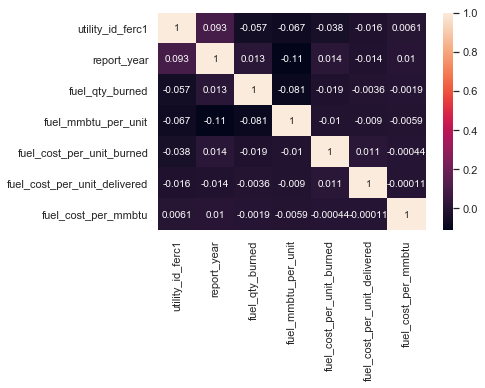

In [12]:
sns.heatmap(fuel_data.corr(), annot=True)

Low correlation levels which means low corresponding systematic change in values of one variable with respect to another 

**Most Popular Fuel type**

In [13]:
#Using a catplot for illustration
col={"gas":"cyan","coal":"black","oil":"red","nuclear":"springgreen","waste":"saddlebrown","other":'slategray'}

Text(-13.950000000000003, 0.5, 'Fuel Type')

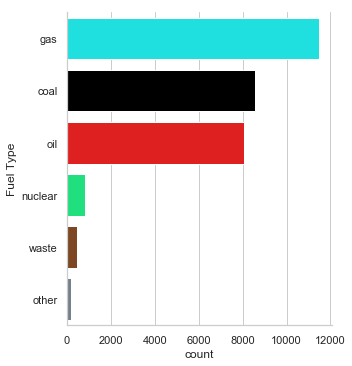

In [15]:
sns.catplot(y='fuel_type_code_pudl',
            kind="count",data=fuel_data,palette=col,order=fuel_data['fuel_type_code_pudl'].value_counts().index)
plt.ylabel('Fuel Type')

**Observation:**
    The most commonly used fuel source is gas,followed by coal and then oil

Text(0.5, 6.799999999999979, 'Fuel Type')

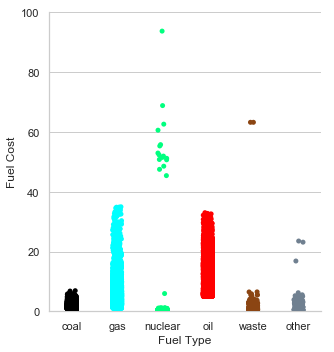

In [16]:
g= sns.catplot(x='fuel_type_code_pudl', y='fuel_cost_per_mmbtu',palette=col,data=fuel_data)
g.set(ylim=(0,100))
plt.ylabel('Fuel Cost')
plt.xlabel('Fuel Type')

**Observation:**
Coal is consistently low with few outliers, while the others come in a wider range of values with higher figures.

# How did fuel prices change over the years

This section takes a look at the price range of fuel accross different power plants over 20 years to deal with the outliers the graphs are in a logarithmic scale



Text(0, 0.5, 'Fuel Cost')

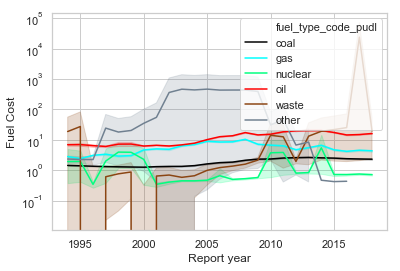

In [18]:
g=sns.lineplot(x='report_year', y='fuel_cost_per_mmbtu',hue='fuel_type_code_pudl',palette=col,data=fuel_data)
g.set_yscale("log")
plt.xlabel('Report year')
plt.ylabel('Fuel Cost')
#unlike other categorical plots, hue helps to give a more coherent line plot as the data is plotted in different streams

**Observations**

The cost of coal has stayed relatively stable over the 20 years

The cost of gas has stayed relatively stable over the 20 years with dips and peaks

The cost of oil has stayed has been on a rise over 20 years

The cost of nuclear varies wildly with sharp peaks and deep dips.

The cost of other varies wildly partly because it is a wide range of materials and because it is not present in every year

The price of waste rose rapidly for over a decade but it is now on a sharp decline

# Fuel Cost Efficiency

Text(664.7742114257812, 0.5, 'Utility ID')

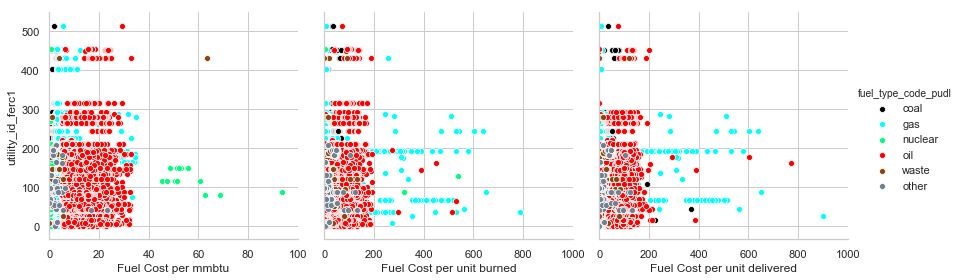

In [26]:
d=sns.pairplot(x_vars=['fuel_cost_per_mmbtu','fuel_cost_per_unit_burned'
                        ,'fuel_cost_per_unit_delivered'], y_vars='utility_id_ferc1',hue='fuel_type_code_pudl'
               ,palette=col,data=fuel_data
                ,height=4,aspect=1)
d.axes[0,0].set(xlim=(0,100), xlabel='Fuel Cost per mmbtu')
d.axes[0,1].set(xlim=(0,1000), xlabel='Fuel Cost per unit burned')
d.axes[0,2].set(xlim=(0,1000), xlabel='Fuel Cost per unit delivered')


Most of the plants are located in between ID code 1-400, Nuclear power plants are more expensive per mmbtu, gas is very expensive to burn and deliver (with high operational costs) it makes up for this by being cheap per energy produced, nuclear costs vary widely, coal power has very low running and mmbtu cost but has moderate delivery costs.

**Plotting Fuel quantity against total energy cost**

In [28]:
fuel_data["total_burning_cost"]= fuel_data["fuel_cost_per_unit_burned"]*fuel_data["fuel_qty_burned"]
#assuming same quantity burned is the one delivered
fuel_data["total_delivery_cost"]= fuel_data["fuel_cost_per_unit_delivered"]*fuel_data["fuel_qty_burned"]

#how much energy are the plants producing
fuel_data["total_energy_produced"] = fuel_data["fuel_mmbtu_per_unit"]*fuel_data["fuel_qty_burned"]
#how much the total energy cost
fuel_data["total_energy_cost_unit"]=fuel_data["fuel_mmbtu_per_unit"]*fuel_data["fuel_cost_per_unit_burned"]
fuel_data["total_operation_cost_per_unit"]=fuel_data["fuel_cost_per_unit_burned"]+fuel_data["fuel_cost_per_unit_delivered"]
fuel_data.head()

,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu,total_burning_cost,total_delivery_cost,total_energy_produced,total_energy_cost_unit,total_operation_cost_per_unit
0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121,9.996752e+07,9.964487e+07,8.921254e+07,308.40810,37.12
1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120,1.948474e+08,1.943231e+08,1.739994e+08,308.27936,37.11
2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650,1.183133e+08,1.135474e+08,7.187562e+07,958.44360,77.84
3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970,1.765410e+08,1.719789e+08,8.956064e+07,1130.67950,93.20
4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570,1.122764e+05,1.122764e+05,4.053300e+04,2.77000,5.54


[(0, 1000), Text(0.5, 20.84687500000001, 'Total operation cost')]

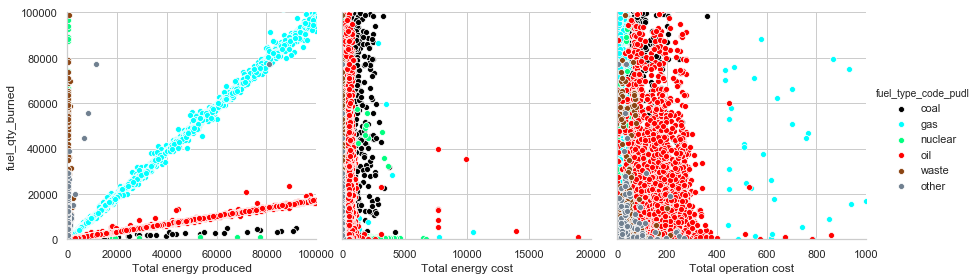

In [29]:
e=sns.pairplot(x_vars=["total_energy_produced","total_energy_cost_unit","total_operation_cost_per_unit"]
               , y_vars='fuel_qty_burned',hue='fuel_type_code_pudl',palette=col,data=fuel_data
                ,height=4,aspect=1)
e.axes[0,0].set(ylim=(0,100000))
e.axes[0,0].set(xlim=(0,100000), xlabel='Total energy produced')
e.axes[0,1].set(xlim=(0,20000), xlabel='Total energy cost')
e.axes[0,2].set(xlim=(0,1000), xlabel='Total operation cost')


The fuel quantity burned has an obvious linear relationship with the energy produced, with the exception of waste and other, the energy cost is relatively constant for fuel types so they form clusters with a few outliers, same with operation costs.



**Conclusion:**

Much thanks to **vervainalthor** for his help and explanation on some of the features used :).